<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/edo/blob/main/banco_preguntas/trabajo_final_dinamica_poblacional/6_sierra_vergara/sierra_mezcla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# Aplicaciones  

Un tipo de problema que se puede describir en términos de una ecuación diferencial involucra mezclas químicas, como se ilustra en el siguiente ejemplo.  

El proximo ejemplo es tomado de la página 455 del Larson. 

## EJEMPLO 4 Un problema de mezcla

Un tanque contiene 50 galones de una disolución compuesta por 90% agua y 10% alcohol.  

Una segunda disolución que contiene 50% agua y 50% alcohol se agrega al tanque a una tasa de 4 galones por minuto. Conforme se añade la segunda, el tanque empieza a drenar a una tasa de 5 galones por minuto, como se muestra en la figura 6.21.   

Si se supone que la disolución en el tanque se agita constantemente, ¿cuánto alcohol permanecerá en el tanque después de 10 minutos?

<img src = 'https://github.com/marco-canas/edo/blob/main/banco_preguntas/trabajo_final_dinamica_poblacional/6_sierra_vergara/figura_6_21.jpg?raw=true'>

## [Video de apoyo](https://www.youtube.com/watch?v=ACo-VT5E_r0) 

## Resuelva analíticamente el PVI que modela el problema de mezclas asignado: 

Sea $y(t)$ el número de galones de alcohol en el tanque en cualquier instante $t$. 

Se sabe que $y = 5$ cuando $t = 0$.

Como la diferencia entre lo que entra y lo que sale del tanque es de $1$ galón por minuto, entonces 

La función que modela el volumen de líquido en la mezcla en cada instante es lineal (tasa de decrecimiento constante) 

$$ \text{número de galones en cada instante es} = -1(t) + 50 = 50 - t $$


Dado que el número de galones en el tanque en cualquier tiempo es $50 - t \geq 0$, y que el tanque pierde 5 galones por minuto, se debe perder $[5/(50 - t)]y$ galones de alcohol por minuto. 

Esto, porque $$ \frac{y(t)}{50-t} $$ es la concentración de alcohol en el tanque en el instante $t$ y esta concentración por la taza de salida, nos da la tasa de alcohol que sale. Note que la concentración es un porcentaje representado en forma decimal. 

$$ \text{tasa de salida de alcohol en el instante $t$} = \text{tasa de salida de mezcla} \cdot \text{porcentaje de alcohol en la mezcla en el instante $t$}$$

$$ \text{tasa de alcohol que sale en el instante $t$} = 5 \cdot \frac{y(t)}{5-t}  $$

Además, ya que el tanque gana 2 galones de alcohol por minuto, el ritmo o velocidad de cambio de alcohol en el tanque está dada por  

$$ \frac{d}{dt} y(t) = 2 - 5\left( \frac{y(t)}{50 - t} \right) \ \ \ \ \ \ \ \Rightarrow \ \ \ \  \ \ \ \frac{dy}{dt} + \left( \frac{5}{50 - t} \right)y = 2  $$

$$ y' + p(t)y = g(t) $$

Para resolver esta ecuación diferencial sea $p(t) = \frac{5}{50 - t}$ 

$$ \mu(t) = \exp \left(\int \frac{5}{50-t}dt \right) =  $$

$$ \mu(t) = \exp \left( 5 \int \frac{1}{50 - t} dt \right) $$

$$ \mu(t) = \exp \left( -5 \int \frac{-dt}{50-t} \right) $$

$$ \mu(t) = \exp \left( -5\ln(50-t) \right) = \exp \left( \ln \left[ \frac{1}{ (50-t)^{5} } \right] \right)  $$

$$ \mu(t) = \frac{1}{(50-t)^{5}} = (50-t)^{-5} $$

Multipliquemos la ED por este factor integrante:


$$ \frac{dy}{dt} + \left( \frac{5}{50 - t} \right)y = 2 $$

$$ \frac{dy}{dt}\cdot \frac{1}{(50-t)^{5}}  + \left( \frac{5}{50 - t} \right)y \cdot \frac{1}{(50-t)^{5}} = 2 \cdot \frac{1}{(50-t)^{5}} $$


$$ \left[ y(t) \cdot \frac{1}{(50-t)^{5}} \right]' = 2(50-t)^{-5} $$

$$ \int \left[ y(t) \cdot \frac{1}{(50-t)^{5}} \right]'dt = \int 2(50-t)^{-5}dt $$

$$ y(t) \cdot \frac{1}{(50-t)^{5}} = -2\int (50 - t)^{-5}(-dt) $$


$$ y(t) \cdot \frac{1}{(50-t)^{5}} = -2\int u^{-5} du $$

donde $u = 50-t$

$$ \frac{y(t)}{(50-t)^{5}} = -2\frac{(50-t)^{-4}}{-4} + C_{1} $$

$$ \frac{y(t)}{(50 - t)^{5}} = \frac{1}{2(50-t)^{4}} + C_{1} $$

## Verificar analiticamente que la función solución del PVI efectivamente satisface la ED y la condición inicial. 

# Resuelva y verifique con sympy el PVI y redacte una conclusión verbal donde compare la solución hallada analíticamente con la solución hallada con la librería de cálculo simbólico sympy.  

In [1]:
from sympy import var, Function, diff, Eq, ode_order,\
classify_ode, dsolve, solvers, checkodesol 

In [2]:
t,y = var('t y') # definición de las variables simbólicas 


In [3]:
y = Function('y')   # establecer la relación funcional entre t y y

In [5]:
ecuacion_dif = Eq(diff(y(t), t) + (5/(50 - t))*y(t) - 2, 0)
ecuacion_dif

Eq(Derivative(y(t), t) - 2 + 5*y(t)/(50 - t), 0)

## Determine el orden de la ED utilizando la función `ode_order` de sympy

In [6]:
ode_order(ecuacion_dif, y(t))

1

## Clasifica la ecuación diferencial del problema de valor inicial dado

In [7]:
classify_ode(ecuacion_dif)

('factorable',
 '1st_exact',
 '1st_linear',
 'Bernoulli',
 'almost_linear',
 'linear_coefficients',
 '1st_power_series',
 'lie_group',
 '1st_exact_Integral',
 '1st_linear_Integral',
 'Bernoulli_Integral',
 'almost_linear_Integral',
 'linear_coefficients_Integral')

Así, la función `classify_ode` nos confirma que la ED dada es lineal de primer orden. 

## Resuelve el PVI con sympy 

In [8]:
sol_gen_latex = dsolve(ecuacion_dif, y(t))  
sol_gen_latex 

Eq(y(t), C1*t**5 - 250*C1*t**4 + 25000*C1*t**3 - 1250000*C1*t**2 + 31250000*C1*t - 312500000*C1 - t/2 + 25)

In [9]:
def sol_gen(t, C1 = 0):
    return C1*(t**5 - 250*t**4 + 25000*t**3 - 1250000*t**2 + 31250000*t - 312500000) - t/2 + 25

In [12]:
 sol_gen(50, C1 = 20/50**5)

0.0

In [ ]:
dsolve(ecuacion_dif, y(t), ics = {sol_gen_latex.lhs.subs(t,0):5})

In [ ]:
def sol_pvi(t):
    return t**5/15625000 - t**4/62500 + t**3/625 - 2*t**2/25 + 3*t/2 + 5

## Describa y clasifique la solución del PVI

1. Note que la función solución es una función polinómica de grado $5$ con coeficiente lider positivo, lo que implica que en el futuro la solución se va a infinito. 
2. El término independiente de $t$ es $5$ lo que concuerda con el hecho de que la condición inicial es de $5$ galones de alcohol. 
3. El coeficiente lider de esta función polinómica es muy pequeño.  

## Diga que tipo de funciones es la solución de la ED. 

**Sugerencia** 

`ics` is the Set of Initial Conditions for the differential equation.

It should be given in the form of `{f(x0): x1, f(x).diff(x).subs(x, x2): x3}` and so on.   



# Gráfica de la solución general de la ED usando matplotlib y la función interact del módulo ipywidgets para gráficos animados con deslizadores 

In [13]:
import numpy as np 
import matplotlib.pyplot as plt 
from ipywidgets import interact 

def sol_gen(t, C1 = 0):
    return C1*(t**5 - 250*t**4 + 25000*t**3 - 1250000*t**2 + 31250000*t - 312500000) - t/2 + 25


def graficar_animado(C1 = 0):
    fig, ax = plt.subplots()
    T = np.linspace(0,50,300)
    Y = [sol_gen(t, C1 = C1*10**-8) for t in T]
    ax.plot(T,Y)
    ax.set(title = 'nivel de alcohol en el tanque en cada instante',\
          xlabel = 'Tiempo en minutos', ylabel = 'cantidad de alcohol en galones')
    ax.axis([0,60, -1,20])
    ax.plot([0,50], [0,0], 'g-.')
    ax.grid(alpha = 0.6)

interact(graficar_animado, C1 = (5,8))    

plt.show() 

interactive(children=(IntSlider(value=5, description='C1', max=8, min=5), Output()), _dom_classes=('widget-int…

## Observaciones a la solución general

1. Cambiar la constante de integración $C_{1}$ cambia la condición inicial y el máximo alcanzado de alcohol.  
2.  
3.  
4.  
5.  

## Graficar la solución particular 

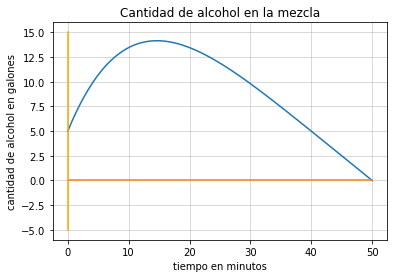

In [14]:
import numpy as np 
import matplotlib.pyplot as plt 

def sol_pvi(t):
    return t**5/15625000 - t**4/62500 + t**3/625 - 2*t**2/25 + 3*t/2 + 5

T = np.linspace(0,50, 300)
Y = [sol_pvi(t) for t in T]

plt.plot(T,Y)
plt.grid(alpha = 0.6) 
plt.title('Cantidad de alcohol en la mezcla')
plt.plot([np.min(T), np.max(T)],[0,0])
plt.plot([0,0], [-5,15], 'orange') # trazo de eje vertical
plt.xlabel('tiempo en minutos')
plt.ylabel('cantidad de alcohol en galones')

plt.savefig('solución PVI.jpg')

plt.show() 

## Observaciones e inferencias del gráfico de la solución del PVI

1. La cantidad de alcohol en el tanque es una función diferenciable cuyo cero es $t = 50$ y cuyo valor inicial es de 5 galones de alcohol. 
2.  
3.  
4.  
5.  

## Referencias  

* Guí de ususario sobre solución de ODE con Sympy: https://docs.sympy.org/latest/modules/solvers/ode.html